# Ranking Different Rule-Based Strategies for Buyer_Intent : 
## RULE_1(th_1, th_2) : consumer_score only

**IF** *consumer_score_papability_to_transact < threshhold_1* **THEN** 
<br/>
assign user stage as *CASUAL SEARCHER|DREAMER*
<br/>
**ELIF** *threshhold_1 < consumer_score_papability_to_transact <threshhold_2* **THEN** 
<br/>
assign user stage as *ACTIVE SEARCHER*
<br/>
**ELSE** assign user stage as *READY_TO_TRANSACT*
<br/>
<br/>
*Assumption : threshhold_1 < threshhold_2*

In [82]:
%run bi_ml_utilities.ipynb 

You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [83]:
df_030 = pd.read_csv('filtered_intr_lead_trans_030.csv')
bi_imp_rf_based_030 = BuyerIntentImputer.rforest_imputer(df_030.drop(columns=['member_id']))

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


In [84]:
threshhold_1 = [0.2, 0.4, 0.6, 0.8]
threshhold_2 = [0.2, 0.4, 0.6, 0.8]
best_models_list = []
no_rules = 0
for th_1 in threshhold_1:
    for th_2 in threshhold_2:
        if th_1 < th_2 :
            no_rules = no_rules + 1
            print("th_1 = {}, th_2 = {}".format(th_1, th_2))
            tmp_bi_imp_rf_based_030 = BuyerIntentStageRuleEngine.rule_3_stages(bi_imp_rf_based_030,[th_1,th_2])
            tmp_bi_imp_rf_based_030 = tmp_bi_imp_rf_based_030.drop(columns = ['consumer_score_probablity_to_transact'])
            tmp_bi_imp_rf_based_030 = BuyerIntentDataSetBalancer.under_sampling(tmp_bi_imp_rf_based_030, 'buyer_stage')
            res = BuyerIntentMLModels.buyer_intent_stage_classifiers_factory(tmp_bi_imp_rf_based_030, 10, full_display=False)
            summary = (res, len(tmp_bi_imp_rf_based_030['buyer_stage'].unique()), th_1, th_2)
            best_models_list.append(summary)

th_1 = 0.2, th_2 = 0.4
th_1 = 0.2, th_2 = 0.6
th_1 = 0.2, th_2 = 0.8
th_1 = 0.4, th_2 = 0.6
th_1 = 0.4, th_2 = 0.8
th_1 = 0.6, th_2 = 0.8


In [85]:
print(no_rules)

6


In [86]:
#for item in best_models_list:
#    if item[1]==3:
#        print(item)

({'best_model': 'DT', 'accuracy': 0.8555555555555555, 'std': 0.10604136429592294}, 3, 0.2, 0.4)
({'best_model': 'DT', 'accuracy': 0.8791588692997145, 'std': 0.09061940819250872}, 3, 0.2, 0.6)
({'best_model': 'DT', 'accuracy': 0.7927755343248301, 'std': 0.10733798495486661}, 3, 0.4, 0.6)


# Summary:

**Optimal** Tuned parameters :

**IF** *consumer_score_papability_to_transact < 0.2* **THEN** 
<br/>
assign user stage as *CASUAL SEARCHER|DREAMER*
<br/>
**ELIF** *0.2 < consumer_score_papability_to_transact <0.6* **THEN** 
<br/>
assign user stage as *ACTIVE SEARCHER*
<br/>
**ELSE** assign user stage as *READY_TO_TRANSACT*
<br/>
<br/>

best_model: RF, accuracy: 0.0.8791588692997145, std: 0.0.09061940819250872

## RULE_2(th_1,th_2,th_3) : consumer_score only

**IF** *consumer_score_papability_to_transact < threshhold_1* **THEN** 
<br/>
assign user stage as DREAMER
<br/>
**ELIF** *threshhold_1 <= consumer_score_papability_to_transact <threshhold_2* **THEN** 
<br/>
assign user stage as CASUAL SEARCHER
<br/>
**ELIF** *threshhold_2 <= consumer_score_papability_to_transact <threshhold_3* **THEN** 
<br/>
assign user stage as ACTIVE SEARCHER
<br/>
**ELSE** assign user stage as READY TO TRANSACT
<br/>
<br/>
*Assumption : threshhold_1 < threshhold_2 < threshhold_3*

In [87]:
threshhold_1 = [0.2, 0.4, 0.6, 0.8]
threshhold_2 = [0.2, 0.4, 0.6, 0.8]
threshhold_3 = [0.2, 0.4, 0.6, 0.8]
best_models_list = []
for th_1 in threshhold_1:
    for th_2 in threshhold_2:
        for th_3 in threshhold_3:
            if th_1 < th_2 and th_2 < th_3:
                print("th_1 = {}, th_2 = {}, th_3 = {}".format(th_1, th_2, th_3))
                tmp_bi_imp_rf_based_030 = BuyerIntentStageRuleEngine.rule_4_stages(bi_imp_rf_based_030, [th_1,th_2,th_3])
                tmp_bi_imp_rf_based_030 = tmp_bi_imp_rf_based_030.drop(columns = ['consumer_score_probablity_to_transact'])
                tmp_bi_imp_rf_based_030 = BuyerIntentDataSetBalancer.under_sampling(tmp_bi_imp_rf_based_030, 'buyer_stage')
                res = BuyerIntentMLModels.buyer_intent_stage_classifiers_factory(tmp_bi_imp_rf_based_030, 10, full_display=False)
                summary = (res, len(tmp_bi_imp_rf_based_030['buyer_stage'].unique()), th_1, th_2, th_3)
                best_models_list.append(summary)

th_1 = 0.2, th_2 = 0.4, th_3 = 0.6
th_1 = 0.2, th_2 = 0.4, th_3 = 0.8
th_1 = 0.2, th_2 = 0.6, th_3 = 0.8
th_1 = 0.4, th_2 = 0.6, th_3 = 0.8


In [88]:
for item in best_models_list:
    if item[1]==4:
        print(item)

({'best_model': 'DT', 'accuracy': 0.7934200310559006, 'std': 0.15897685307124085}, 4, 0.2, 0.4, 0.6)


# Summary:

**IF** *consumer_score_papability_to_transact < 0.2* **THEN** 
<br/>
assign user stage as DREAMER
<br/>
**ELIF** *0.2 <= consumer_score_papability_to_transact <0.4* **THEN** 
<br/>
assign user stage as CASUAL SEARCHER
<br/>
**ELIF** *0.4 <= consumer_score_papability_to_transact <0.6* **THEN** 
<br/>
assign user stage as ACTIVE SEARCHER
<br/>
**ELSE** assign user stage as READY TO TRANSACT
<br/>
<br/>

best_model = 'DT', 'accuracy': 0.7980210983091427, 'std': 0.0.152804917252273

## Recomendation : The first rule works better than the second one

## RULE_3 : RULE_3(no_saved_searches, no_lead_submission, consumer_score, s_th_1, s_th_2, s_th_3, l_th_1, l_th_2, l_th_3, c_th_1, c_th_2, c_th_3)

In [89]:
# Normalized total_saved_listings
max_total_saved_listings = bi_imp_rf_based_030['total_saved_listings'].describe()['max']
bi_imp_rf_based_030['total_saved_listings'] = bi_imp_rf_based_030['total_saved_listings']/max_total_saved_listings
print(max_total_saved_listings)

613.0


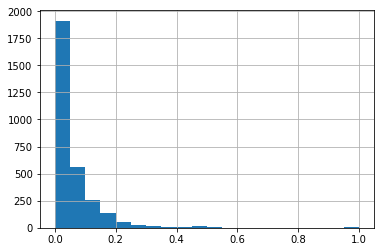

In [90]:
bi_imp_rf_based_030['total_saved_listings'].hist(bins=20)

In [91]:
max_total_leads_submitted = bi_imp_rf_based_030['total_leads_submitted'].describe()['max']
bi_imp_rf_based_030['total_leads_submitted']=df_030['total_leads_submitted']/max_total_leads_submitted
print(max_total_leads_submitted)

73.0


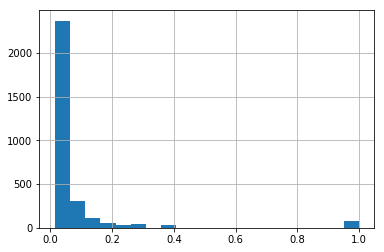

In [92]:
bi_imp_rf_based_030['total_leads_submitted'].hist(bins = 20)

In [95]:
values = [0.2, 0.4, 0.6, 0.8]
total_saved_listings_ths_interval = []
total_leads_submitted_ths_interval = []
consumer_score_probablity_to_transact_ths_interval= []
interval=dict()
best_models_list = []

for th_1 in values:
    for th_2 in values:
        if th_1 < th_2 :
            total_saved_listings_ths_interval.append([th_1,th_2])
            total_leads_submitted_ths_interval.append([th_1,th_2])
            consumer_score_probablity_to_transact_ths_interval.append([th_1,th_2])


for item_1 in total_saved_listings_ths_interval:
    for item_2 in total_leads_submitted_ths_interval:
        for item_3 in consumer_score_probablity_to_transact_ths_interval: 
            print("total_saved_listings_interval = {}, total_leads_submitted_interval = {}, consumer_score_probablity_to_transact_interval = {}".format(str(item_1), str(item_2), str(item_3)))   
            interval['total_saved_listings'] = item_1
            interval['total_leads_submitted'] = item_2
            interval['consumer_score_probablity_to_transact'] = item_3
            tmp_bi_imp_rf_based_030 = BuyerIntentStageRuleEngine.rule_3_stages(bi_imp_rf_based_030, interval, rule_name = 'listings_leads_consumer_score')
            tmp_bi_imp_rf_based_030 = tmp_bi_imp_rf_based_030.drop(columns = ['total_saved_listings','total_leads_submitted','consumer_score_probablity_to_transact'])
            tmp_bi_imp_rf_based_030 = BuyerIntentDataSetBalancer.under_sampling(tmp_bi_imp_rf_based_030, 'buyer_stage')
            res = BuyerIntentMLModels.buyer_intent_stage_classifiers_factory(tmp_bi_imp_rf_based_030, 10, full_display=False)
            summary = (res, len(tmp_bi_imp_rf_based_030['buyer_stage'].unique()), item_1, item_2, item_3)
            best_models_list.append(summary)

total_saved_listings_interval = [0.2, 0.4], total_leads_submitted_interval = [0.2, 0.4], consumer_score_probablity_to_transact_interval = [0.2, 0.4]
total_saved_listings_interval = [0.2, 0.4], total_leads_submitted_interval = [0.2, 0.4], consumer_score_probablity_to_transact_interval = [0.2, 0.6]
total_saved_listings_interval = [0.2, 0.4], total_leads_submitted_interval = [0.2, 0.4], consumer_score_probablity_to_transact_interval = [0.2, 0.8]
total_saved_listings_interval = [0.2, 0.4], total_leads_submitted_interval = [0.2, 0.4], consumer_score_probablity_to_transact_interval = [0.4, 0.6]
total_saved_listings_interval = [0.2, 0.4], total_leads_submitted_interval = [0.2, 0.4], consumer_score_probablity_to_transact_interval = [0.4, 0.8]
total_saved_listings_interval = [0.2, 0.4], total_leads_submitted_interval = [0.2, 0.4], consumer_score_probablity_to_transact_interval = [0.6, 0.8]
total_saved_listings_interval = [0.2, 0.4], total_leads_submitted_interval = [0.2, 0.6], consumer_score_pr

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0.0

# Summary:

best_model = RF', 'accuracy': 0.9723809523809523, 'std': 0.036692940493862965}, 3, [0.4, 0.6], [0.2, 0.4], [0.4, 0.8])

## Recomendation : The Third RULE is working better than the two other RULES

## RULE_4 : RULE_4(no_saved_searches, no_lead_submission, ss_th_1, ss_th_2, l_th_1, l_th_2)

In [98]:
values = [0.2, 0.4, 0.6, 0.8]
total_saved_listings_ths_interval = []
total_leads_submitted_ths_interval = []
interval=dict()
best_models_list = []

for th_1 in values:
    for th_2 in values:
        if th_1 < th_2 :
            total_saved_listings_ths_interval.append([th_1,th_2])
            total_leads_submitted_ths_interval.append([th_1,th_2])

In [99]:
for item_1 in total_saved_listings_ths_interval:
    for item_2 in total_leads_submitted_ths_interval:
            print("total_saved_listings_interval = {}, total_leads_submitted_interval = {}".format(str(item_1), str(item_2)))   
            interval['total_saved_listings'] = item_1
            interval['total_leads_submitted'] = item_2
            tmp_bi_imp_rf_based_030 = BuyerIntentStageRuleEngine.rule_3_stages(bi_imp_rf_based_030, interval, rule_name = 'listings_leads')
            tmp_bi_imp_rf_based_030 = tmp_bi_imp_rf_based_030.drop(columns = ['total_saved_listings','total_leads_submitted'])
            tmp_bi_imp_rf_based_030 = BuyerIntentDataSetBalancer.under_sampling(tmp_bi_imp_rf_based_030, 'buyer_stage')
            res = BuyerIntentMLModels.buyer_intent_stage_classifiers_factory(tmp_bi_imp_rf_based_030, 10, full_display=False)
            summary = (res, len(tmp_bi_imp_rf_based_030['buyer_stage'].unique()), item_1, item_2)
            best_models_list.append(summary)

total_saved_listings_interval = [0.2, 0.4], total_leads_submitted_interval = [0.2, 0.4]
total_saved_listings_interval = [0.2, 0.4], total_leads_submitted_interval = [0.2, 0.6]
total_saved_listings_interval = [0.2, 0.4], total_leads_submitted_interval = [0.2, 0.8]
total_saved_listings_interval = [0.2, 0.4], total_leads_submitted_interval = [0.4, 0.6]
total_saved_listings_interval = [0.2, 0.4], total_leads_submitted_interval = [0.4, 0.8]
total_saved_listings_interval = [0.2, 0.4], total_leads_submitted_interval = [0.6, 0.8]
total_saved_listings_interval = [0.2, 0.6], total_leads_submitted_interval = [0.2, 0.4]
total_saved_listings_interval = [0.2, 0.6], total_leads_submitted_interval = [0.2, 0.6]
total_saved_listings_interval = [0.2, 0.6], total_leads_submitted_interval = [0.2, 0.8]
total_saved_listings_interval = [0.2, 0.6], total_leads_submitted_interval = [0.4, 0.6]
total_saved_listings_interval = [0.2, 0.6], total_leads_submitted_interval = [0.4, 0.8]
total_saved_listings_interval = 

{'best_model': 'DT', 'accuracy': 0.95, 'std': 0.06666666666666665}, 3, [0.4, 0.6], [0.4, 0.8])